#### Abstract
Volatile time series contain precursor events which are predictable, given key considerations. Among those are surges in mean values, inverse correlated factors, pending events among the response variable, and the strength of association among correlated vectors. Six months of time series data was captured and summarized at five day intervals, to model a multi-factor predictive model. 

##### Notebook Template
contains seven major studies
1. Explaining volatile median values amidst inverse causal factors. The LOB median (mp) is expressed as a middle line between causal buy and ask capitalizatoin. How does variance in price receive pull and push from both flows of funds, and thus create volatility. Plot diverging ac/bc on one axis, with mp on a right hand. 
2. The Predictive value of pending orders. Assuming that bid capitalization mirrors midpoint values, what is the probability that values within the pending bids (within an constant divergence from mp) occur? Take the minimum bid value from the subsampled order book, then study whether that minimum value occurs within a future set of filled prices.
3. Bid cap and Ask cap alignment. Is there a continuous divergence, or do these time series change, in terms of their Chi-association and correlative inverse? A dual multiline where the series fluctuate freely. Ac vs Bc
4. Surges in Mean values, as precursors to surges in price. Plot left/right handed mp vs mean values. Does a surge in mean LOB values predict, or predate a surge in MP? 
5. Neighborhood correlations, beyond local data. How does the category leader, bitcoin operate as a leading star in the local constellation of crypto values? How does bitcoin force the mp of AVAX up and down, how do they correlate? 
6. Extra-neighborhood correlations. Inside a matrix of commodities, how does the change in global commodities impact the leader of the crypto space, ie bitcoin? When/how does oil, grain and metals cause bitcoin to gain and/or lose favor? Does the global commmodity community use bitcoin in tandem with other commods, as an inverse/hedge, or how? 
7. mock trades, model performance. Train and test, with error rates. 

##### Methodology
- Create a five day supply of data. 
- Create a five day series of multiplot charts, in a line on a row. 
- Indicate their date value, to help study long term viability of trend. 
- Store all data, timestamp all entries. 

##### Global Journal
bid caps are not 100% determinant upon price, as price creates a dynamic loop, wherein declines in price create buy-up scenarios. Hence price and volume co-predict. They operate as partially predictive, then dependent. Hence, this defines a hard-to-predict situation. Sometimes price is following, sometimes it is leading. 

##### Study 1: ask and bid capitalization trending together

In [8]:
import pandas as pd
df = pd.read_csv("/home/stefanbund/ubuntu/m1/lob_caps/Fri Aug 12 2022 06:31:51 GMT-0700 (Pacific Daylight Time)-CAPS.csv")
mn = pd.read_csv("/home/stefanbund/ubuntu/m1/lob_caps/Fri Aug 12 2022 06:31:51 GMT-0700 (Pacific Daylight Time)-MEANSHIFT.csv")

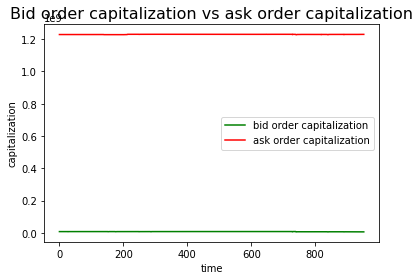

In [10]:
import matplotlib.pyplot as plt
#mp is price
plt.plot(df['bc'], color='green', label='bid order capitalization')
plt.plot(df['ac'], color='red', label='ask order capitalization')
plt.ylabel('capitalization', fontsize=10)
plt.xlabel('time', fontsize=10)
plt.title('Bid order capitalization vs ask order capitalization', fontsize=16)
plt.legend()

plt.show()


##### Study 2: Price in relation to capitalization
capture goals for study 1 above. use example on ![https://www.statology.org/matplotlib-two-y-axes/}]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'ac / bc')

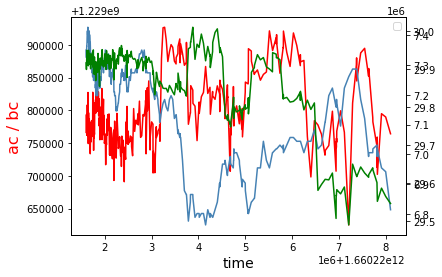

In [21]:
import pandas as pd
df.head()
#create DataFrames
df1 = df[['ac','time']]
df2 = df[['mp', 'time']]
df3 = df[['bc','time']]
import matplotlib.pyplot as plt

#define colors to use
col1 = 'red'#ac is always read
col2 = 'steelblue'
col3 = 'green'#bc is alaways green in the study

#define subplots
fig,ax = plt.subplots()
ax.legend()
#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
ax3 = ax.twinx()
#add first line to plot
ax.plot(df1.time, df1.ac, color=col1)#ac is red
ax3.plot(df3.time, df3.bc, color=col3)# bc is green
#add second line to plot
ax2.plot(df2.time, df2.mp, color=col2)#mp is blue
#add x-axis label
ax.set_xlabel('time', fontsize=14)

#add y-axis label
ax.set_ylabel('ac / bc', color=col1, fontsize=16)




#add second y-axis label
#ax2.set_ylabel('price', color=col2, fontsize=16)
#ax3.set_ylabel('bc', color=col3, fontsize=16)

<AxesSubplot:xlabel='time', ylabel='mp'>

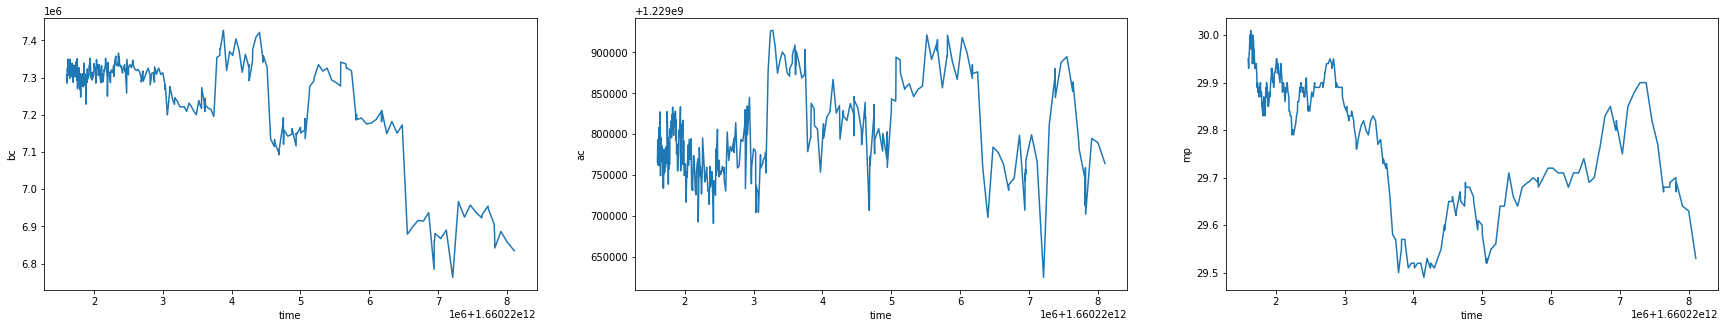

In [8]:
import seaborn as sns

fig, axs = plt.subplots(ncols=3, figsize=(30,5))

sns.lineplot(x="time", y="bc", data=df, ax=axs[0])
sns.lineplot(x="time", y="ac", data=df, ax=axs[1])
sns.lineplot(x="time", y="mp", data=df, ax=axs[2])

##### Study 2 observations
Price (green) does not always follow bid order rate of capitalization. It seems to pick up the ask capitalization under certain circumstances. 

##### Study 1 results

##### Study 3: The Predictive value of pending orders
goals for study: Prepare data for min bid price, from orderbookAnalysis, not histogram

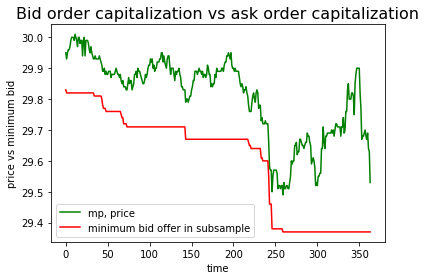

In [7]:
# graph section, mp vs min bid
import matplotlib.pyplot as plt
import pandas as pd
#use pd 

plt.plot(df['mp'], color='green', label='mp, price')
plt.plot(df['minBid'], color='red', label='minimum bid offer in subsample')
plt.ylabel('price vs minimum bid', fontsize=10)
plt.xlabel('time', fontsize=10)
plt.title('Bid order capitalization vs ask order capitalization', fontsize=16)
plt.legend()

plt.show()

lower bound is an always-value. It is always there, and can't predict the median, mp. 

In [2]:
#algorith. get minimum bid price values from orderBookAnalysis. Iterate all mp fills, count all matches for i, summarize as probability distribution or frequency table, explain how/why min matches future mp. 

##### Study 4: Surges in Mean values, as precursors to surges in price
utilize pulsations in mean as predictor to surges in mp. Low mean values connote lower prices at lower volumes, in demand orders. Mean tends to increase along lower mp, and decreases along higher mp. These values tend to push and pull against each other, causing eachother roughly 50%, then changing.

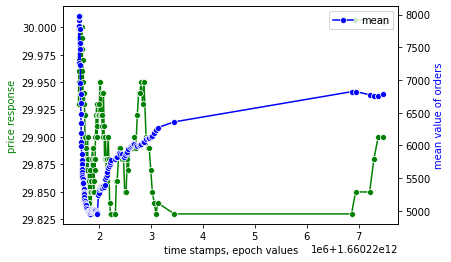

In [5]:
# right hand, left hand graph of mean and mp over same time series (MEANSHIFT)
import seaborn as sns # Calls in seaborn
import matplotlib.pyplot as plt
import pandas as pd

# These lines generate the data to be plotted
y = mn['mp'].to_numpy()#convert to array
x = mn['timeStamp'].to_numpy()
y1 = mn['mean'].to_numpy()

fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

#sns.barplot(x = x, y = y, ax = ax1, color = 'blue') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = x, y = y1, marker = 'o', color = 'blue', ax = ax2, label='mean') # plots the second set, and sets to ax2. 
sns.lineplot(x = x, y = y, marker = 'o', color = 'green', ax = ax1, label='mp') # plots the second set, and sets to ax2. 


# these lines add the annotations for the plot. 
ax1.set_xlabel('time stamps, epoch values')
ax1.set_ylabel('price response', color='g')
ax2.set_ylabel('mean value of orders', color='b')


plt.show(); # shows the plot. 

##### Study 4 Observations
More orders get made at lower prices. Surges in order value precede fall offs, and surges in price can halt accumulation. 

## Study 5: Neighborhood correlations, beyond local data
how does AVAX operate as a member of a community of digital commodites? How is AVAX pulled into a correlative orbit around the category leader, bitcoin? How do BTCUSD and AVAXUSD correlate, associate and predict each other? Does bitcoin move first? 

In [5]:
# correlate bitcoin and avalanche, historical data, price from cryptocompare api 

## Study 6: bitcoin vs the world (of commodites)
the commodity matrix, correlating bitcoin versus oil, grain, oj other commodities. How does the commodity trading community evaluate bitcoin? How can this correlative matrix infer predictive value to Avalanche? utilize resource here, on correlation matrix ![https://www.statology.org/correlation-matrix-python/] 

In [7]:
# offer bitcoin inside a correlation matrix, to discover the ranked relationships bitcoin vs all others. 
# To which commods is btc the closest ranked? How can we infer bitcoin performance from other commodities, over time? 

## Study 7: mock trades, model performance
compile all data into a compendium, then read-in all csv data, to backtest model

## Study 8: Economic Indicators and LOB precursor, coiled metaorders

DO THIS AFTER #9. Understand how announcements act as a third dimension to LOB (per #8)

LOB techniques applied across the fall orders, aug 11 through nov 11, 2022 amidst a crashing US risk environment. 

Should take all above studies, and collect per economic announcement.

notes:
1. capture a corr() value between two values for each day of the study
2. capture an R2 value, same couplet.
3. model, then do logistic regression for model, use ROC/AUC

For a set of values beyond two variables, ie bc/ac vs mp, calculate the +/- spread between bc/ac, then utilize versus mp. Hence, calculate an artificial baseline, ie mean difference, then use against the mp. 

can you group the indicators so that the indicator can possess its own dataset? Correct the capitalization of the indicator, and group by. 

Graph of indicators. Take the set of them, and describe their own paths. A cool economic series, setting up the context for the study (worsening conditions)

The mechanism of Study 8 is to permit the LOB studies to perform against the backdrop of quarterly, unrevised  indicators. 

A data dictionary comes before any further work can start. 

